In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 20
CHANNELS = 3

In [3]:
#load data set from directory

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size=32,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

    

Found 2152 files belonging to 3 classes.


In [4]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
#check dataset

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(label_batch.numpy())

[[[142. 133. 136.]
  [148. 139. 142.]
  [135. 126. 129.]
  ...
  [163. 157. 159.]
  [163. 157. 159.]
  [163. 157. 159.]]

 [[158. 149. 152.]
  [169. 160. 163.]
  [159. 150. 153.]
  ...
  [165. 159. 161.]
  [165. 159. 161.]
  [166. 160. 162.]]

 [[159. 150. 153.]
  [166. 157. 160.]
  [148. 139. 142.]
  ...
  [165. 159. 161.]
  [167. 161. 163.]
  [168. 162. 164.]]

 ...

 [[131. 127. 128.]
  [128. 124. 125.]
  [130. 126. 127.]
  ...
  [180. 175. 181.]
  [179. 174. 180.]
  [181. 176. 182.]]

 [[135. 133. 134.]
  [126. 124. 125.]
  [121. 119. 120.]
  ...
  [178. 173. 179.]
  [177. 172. 178.]
  [181. 176. 182.]]

 [[140. 138. 139.]
  [126. 124. 125.]
  [116. 114. 115.]
  ...
  [180. 175. 181.]
  [181. 176. 182.]
  [187. 182. 188.]]]
[0 0 1 0 0 1 0 1 1 0 0 2 1 1 0 1 0 1 1 1 2 0 1 1 2 1 1 1 0 0 1 0]


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

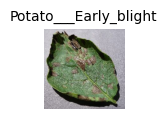

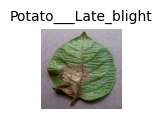

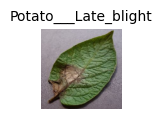

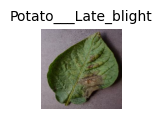

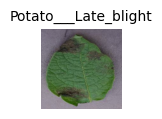

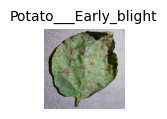

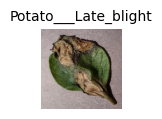

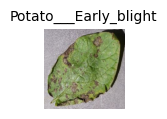

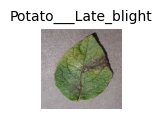

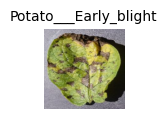

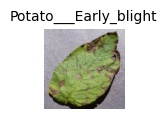

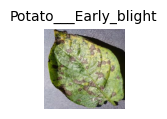

In [8]:
#check dataset

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]], fontsize = 10)
        plt.axis('off')
        plt.show()

In [9]:
len(dataset)

68

80% =>  trainnig  
20% =>  10% => validation , 10% => test   
    

In [11]:
train_size = 0.8
round(len(dataset) * train_size)

54

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
#temp 20% test data
temp_test_ds = dataset.skip(54)
len(temp_test_ds)

14

In [14]:
val_size = 0.1
round(len(dataset) * val_size)

7

In [15]:
#validation dataset
val_ds = temp_test_ds.take(7)
len(val_ds)

7

In [16]:
#actual test dataset
test_ds = temp_test_ds.skip(7)
len(test_ds)

7

In [17]:
#All will done in single function

def get_dataset_partitions_tf(ds, train_size = 0.8, test_size = 0.1 , val_size = 0.1, shuffle = True, shuffle_size = 10000):
    ds_len = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 15)
    train_len = round(ds_len * train_size)
    val_len = round(ds_len * val_size)
    
    train_ds = ds.take(train_len)
    test_ds = ds.skip(train_len).take(val_len)
    val_ds = ds.skip(train_len).skip(val_len)

    return train_ds,test_ds,val_ds

    


    

In [18]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [19]:
#cache and prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [20]:
#resizing and rescalling the image

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
    
])

In [21]:
#augmentation (Zoom, flip, rotation)
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomFlip()    
])


**MODEL BUILDINGS**

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
no_of_class = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(no_of_class, activation = "softmax")
    
])

E:\pc\ds\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [27]:
history = model.fit(
            train_ds,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            verbose=1,
            validation_data=val_ds,
        )

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 870ms/step - accuracy: 0.5080 - loss: 0.9168 - val_accuracy: 0.5900 - val_loss: 0.7989
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 822ms/step - accuracy: 0.6959 - loss: 0.7016 - val_accuracy: 0.8100 - val_loss: 0.5082
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 849ms/step - accuracy: 0.8262 - loss: 0.4507 - val_accuracy: 0.8600 - val_loss: 0.3299
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 895ms/step - accuracy: 0.8800 - loss: 0.3231 - val_accuracy: 0.8650 - val_loss: 0.2983
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8812 - loss: 0.3149 - val_accuracy: 0.8000 - val_loss: 0.4927
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8411 - loss: 0.4006 - val_accuracy: 0.8800 - val_loss: 0.2942
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9030 - loss: 0.2613 - val_accuracy: 0.8850 - val_loss: 0.3104
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9403 - loss: 0.1744 - val_accuracy: 0.8600

In [28]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9845 - loss: 0.0895


In [29]:
history #Its a basically history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
val_loss

[0.7988847494125366,
 0.5082228183746338,
 0.32986772060394287,
 0.29832690954208374,
 0.49273931980133057,
 0.29417741298675537,
 0.3103756606578827,
 0.43545424938201904,
 0.3504539430141449,
 0.11349797993898392,
 0.08593159914016724,
 0.0696803629398346,
 0.06976452469825745,
 0.18854761123657227,
 0.09558715671300888,
 0.21150413155555725,
 0.10817425698041916,
 0.11295082420110703,
 0.05657279118895531,
 0.04543839767575264]

In [34]:
range(EPOCHS)


range(0, 20)

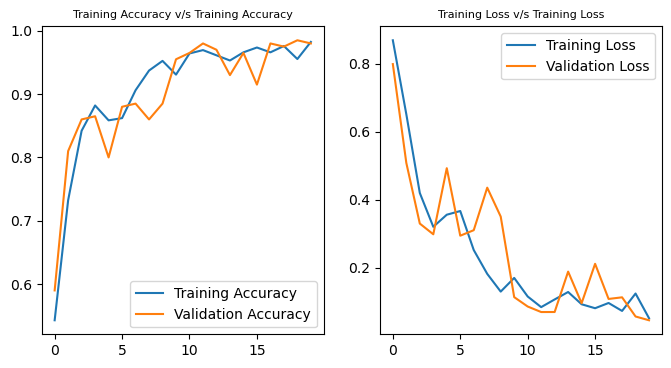

In [35]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training Accuracy v/s Training Accuracy", fontsize = 8)

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss' )
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend()
plt.title("Training Loss v/s Training Loss", fontsize = 8)
plt.show()

In [36]:

image_batch = 0
len(test_ds)

7

In [37]:
import numpy as np

First image print
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
predicted label: Potato___Late_blight


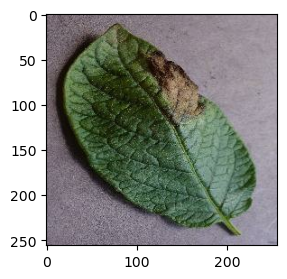

In [38]:
for image_batch, label_batch in test_ds.take(1):
    first_img = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First image print")
    plt.figure(figsize = (3,3))
    plt.imshow(first_img)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #create batch dimension
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100*np.max(predictions[0]), 2)
    
    return predicted_class, confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


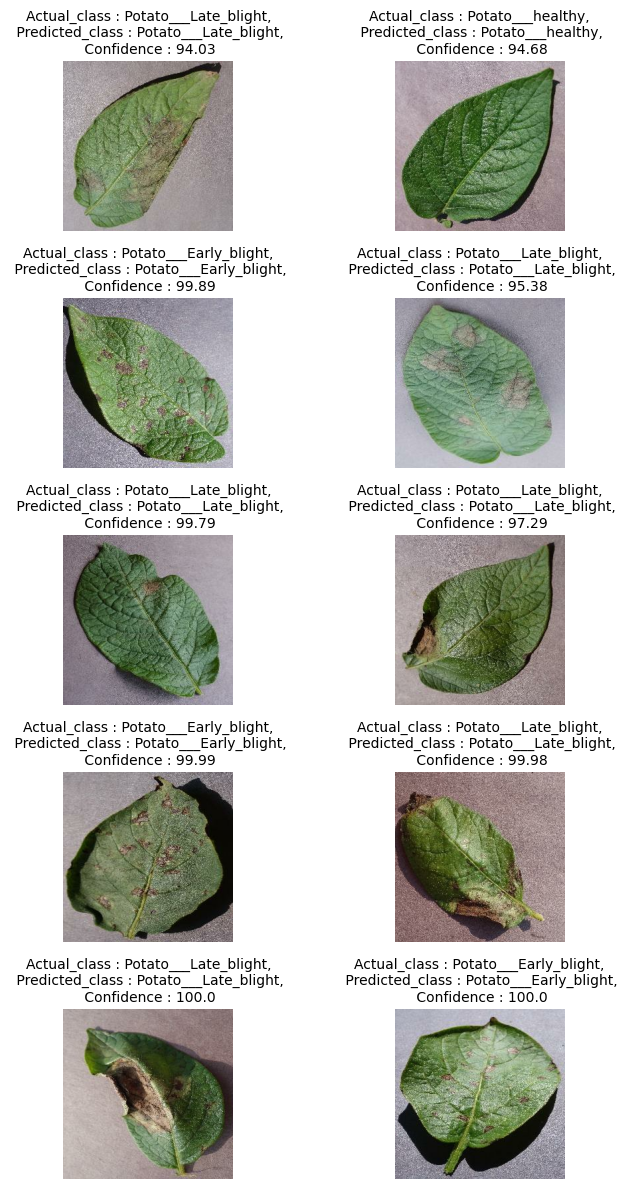

In [40]:

plt.figure(figsize = (8,12))
for images, labels in test_ds.take(1): #test on first batch
    for i in range(10):
        ax = plt.subplot(5,2,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model,images[i].numpy()) 
        actual_class = class_names[labels[i]]

        plt.title(f"Actual_class : {actual_class},\n Predicted_class : {predicted_class},\n Confidence : {confidence}", fontsize = 10 )
        plt.axis("off")
        # Show the entire figure with subplots
plt.tight_layout()  # Prevent overlap of subplots
plt.show()

In [47]:
import os
import re

def upgrade_version_no():
    filenames = os.listdir("../saved_models")
    version_arr = [0]
    for file in filenames:
        base_name, extension = os.path.splitext(file)
        version_arr.append(int(base_name))
    return (max(version_arr) + 1)


In [49]:
upgrade_version_no()

1

In [51]:

# Save the model in .keras format (recommended)
model.save(f"../saved_models/{upgrade_version_no()}.keras")



In [53]:
import os
print(os.path.abspath("../saved_models/{upgrade_version_no()}.keras"))


C:\Users\Kishor\dl_projects\potato_diesese\saved_models\1.keras
